# Introduction to using Bellpedia

This notebook aims to introduce users to the Bellpedia pipeline and demonstrate how:(1) work with the bell tower data, (2) build and construct your own bell towers 

Prior to running this notebook be sure to clone the Bellpedia repository and run ```pip install -e .``` in the root of the repository.

### Import the relevant modules

In [1]:
from bellpedia.load import Generate_Config, Generate_World, grab_my_towers
from bellpedia.world import Tower, Bell
from bellpedia.functions import Coords

from bellpedia.plots import Geoplots

In [2]:
config = Generate_Config()
Geoplt = Geoplots(config=config)

### Construct a tower

We can build a new bell tower using the Tower class. 

In [3]:
Brancepeth = Tower(
    name = "St. Brandon",
    place = "Brancepeth",
    country = "England",
    postcode = "DH7 8DF",
    coordinates = Coords(54.73374, -1.65261),
)
Brancepeth

### Let us add some bells 

Now we define a bell using the Bell class. All we need to specify is the bell number.

In [4]:
Treble = Bell(
    N=1,
    note="F#",
    dated=1888,
    diameter=24.00,
    weight="3-0-4",
    nominal=1466,
    founder="John Taylor & Co" 
)

We can add this bell to our constructed tower.

In [5]:
print(f"Number of bells at {Brancepeth.name} is {Brancepeth.Nbells}")
Brancepeth.add_bell(Treble)
print(f"Number of bells at {Brancepeth.name} is {Brancepeth.Nbells}")

Number of bells at St. Brandon is 0
Number of bells at St. Brandon is 1


In [6]:
weight_nom = [
    ("3-2-18",1374),
    ("4-0-6",1230),
    ("4-3-11",1099),
    ("6-0-2",977),
    ("7-1-23",924),
    ("9-1-24",821),
    ("14-1-13",733)
]
Brancepeth.add_bell_byweightnom(weight_nom, start_N=2)
print(f"Number of bells at {Brancepeth.name} is {Brancepeth.Nbells}")

Number of bells at St. Brandon is 8


In [7]:
print(f"Treble weight is {Brancepeth.treble.weight}, Tenor weight is {Brancepeth.tenor.weight}")
print(f"Weight of the 1 {Brancepeth.get_bell(1).weight},Weight of the 8 is {Brancepeth.get_bell(8).weight}")

Treble weight is 3-0-4, Tenor weight is 14-1-13
Weight of the 1 3-0-4,Weight of the 8 is 14-1-13


we get get some summary information

In [8]:
Brancepeth.summary["Tower"]

,Name,Place,Bells,Tenor,Hundredweight,Country,County,Postcode
None,St. Brandon,Brancepeth,8,14-1-13,14.366071,England,None,DH7 8DF


In [9]:
Brancepeth.summary["Bells"]

,N,C,note,nominal,weight,cwt,diameter,dated
None,1,None,F#,1466,3-0-4,3.035714,60.96,1888
None,2,None,None,1374,3-2-18,3.660714,NaN,None
None,3,None,None,1230,4-0-6,4.053571,NaN,None
None,4,None,None,1099,4-3-11,4.848214,NaN,None
None,5,None,None,977,6-0-2,6.017857,NaN,None
None,6,None,None,924,7-1-23,7.455357,NaN,None
None,7,None,None,821,9-1-24,9.464286,NaN,None
None,8,None,None,733,14-1-13,14.366071,NaN,None


# Geoplot of location

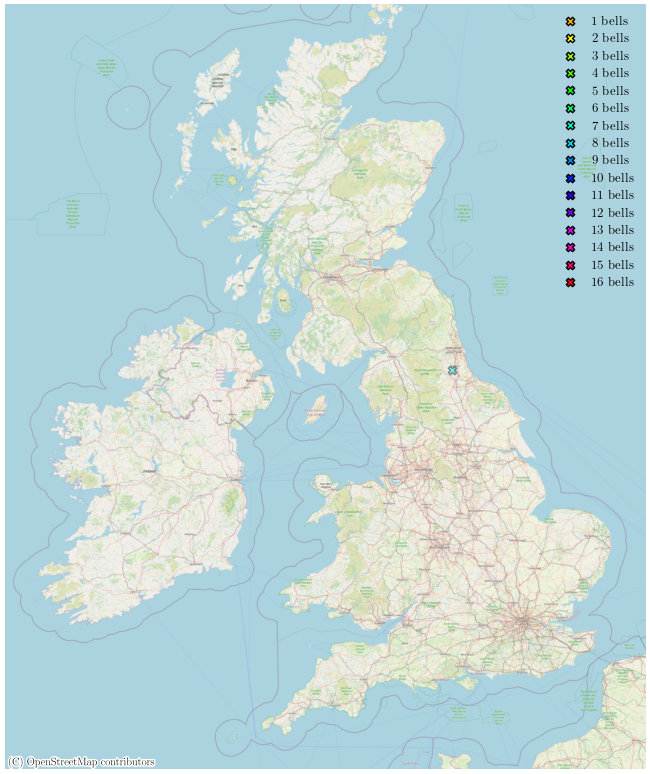

In [10]:
%matplotlib inline
Geoplt.plot_locations(Brancepeth)

# Let's load in all the Dove data

In [19]:
world = Generate_World().world

We can search by a range of categories including;
    "name","place","dove_id","Nbells","coordinates","postcode","country" and "county"

In [12]:
Durham = world.search("Place", "Durham")
Durham.summary

,Name,Place,Bells,Tenor,Hundredweight,Country,County,Postcode
16115,"Cath Ch of Christ, Blessed Virgin Mary, & S Cu...",Durham,10,28-0-6,28.053574,England,Durham,DH1 3EL
10063,S Nicholas,Durham,6,9-3-23,9.955358,England,Durham,DH1 3NJ
12379,S Oswald,Durham,8,12-3-6,12.803572,England,Durham,DH1 3DQ


In [13]:
Durham = world.search("postcode", ["DH1 3EL", "DH1 3NJ", "DH1 3DQ"])
Durham.summary

,Name,Place,Bells,Tenor,Hundredweight,Country,County,Postcode
16115,"Cath Ch of Christ, Blessed Virgin Mary, & S Cu...",Durham,10,28-0-6,28.053574,England,Durham,DH1 3EL
10063,S Nicholas,Durham,6,9-3-23,9.955358,England,Durham,DH1 3NJ
12379,S Oswald,Durham,8,12-3-6,12.803572,England,Durham,DH1 3DQ


In [14]:
Durham = world.search("dove_id", [16115, 10063, 12379])
Durham.summary

,Name,Place,Bells,Tenor,Hundredweight,Country,County,Postcode
16115,"Cath Ch of Christ, Blessed Virgin Mary, & S Cu...",Durham,10,28-0-6,28.053574,England,Durham,DH1 3EL
10063,S Nicholas,Durham,6,9-3-23,9.955358,England,Durham,DH1 3NJ
12379,S Oswald,Durham,8,12-3-6,12.803572,England,Durham,DH1 3DQ


# Tower grab list

In [15]:
my_towers = grab_my_towers(
        filename = 'Examples',
        searchby = "dove_id"
    )
my_towers.summary

,Name,Place,Bells,Tenor,Hundredweight,Country,County,Postcode
11335,S Mary,Gainford,6,11-3-4,11.785715,England,Durham,DL2 3DR
16794,S Mary V,Shincliffe,6,4-0-14,4.125000,England,Durham,DH1 2NW
23240,S Mary V,Seaham,2,NaN,NaN,England,Durham,SR7 7AF
14387,S Cuthbert,Cotherstone,6,NaN,NaN,England,Durham,DL12 9PJ
13164,S Mary,Easington,8,8-2-22,8.696429,England,Durham,SR8 3GA
14053,S Edmund,Sedgefield,6,9-1-2,9.267858,England,Durham,TS21 2AJ
17669,S Cuthbert,Billingham,3,NaN,NaN,England,Durham,TS23 1BW
14288,S Brandon,Brancepeth,8,14-1-13,14.366073,England,Durham,DH7 8DF
10649,S Michael,Heighington,6,15-1-23,15.455358,England,Durham,DL5 6PN
14923,Holy Trinity,Darlington,6,6-3-9,6.830358,England,Durham,DL3 7AR


In [16]:
my_towers.summarybells

,N,C,note,nominal,weight,cwt,diameter,dated
21617,1,None,E♯,1405.0,6-0-15,6.133929,75.565,1865
21618,2,None,D♯,1253.0,6-1-17,6.401786,80.3402,1865
21619,3,None,C♯,1116.0,7-2-23,7.705358,85.725,1865
21620,4,None,B♯,1052.0,7-3-16,7.892858,87.9602,1865
21621,5,None,A♯,937.0,8-2-16,8.642858,93.98,1865
...,...,...,...,...,...,...,...,...
38868,4,None,C♯,1087.0,6-1-16,6.392858,80.01,1902
38869,5,None,B,965.0,7-3-3,7.776786,86.995,1902
38870,6,None,A♯,910.0,8-1-9,8.330358,90.3224,1902
38871,7,None,G♯,815.0,11-2-11,11.598215,100.33,1902


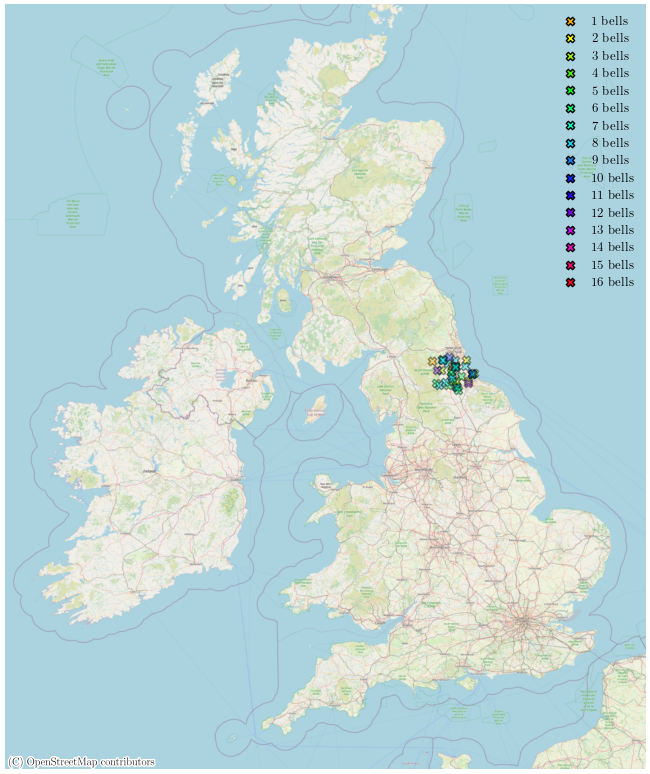

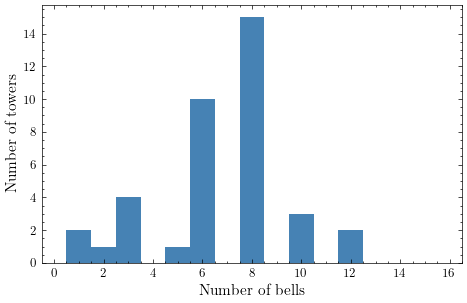

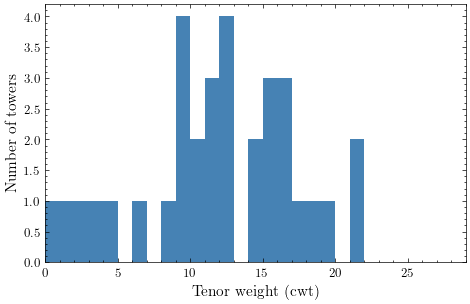

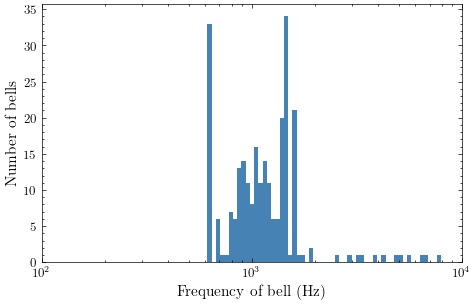

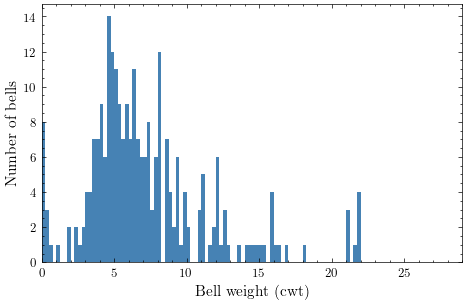

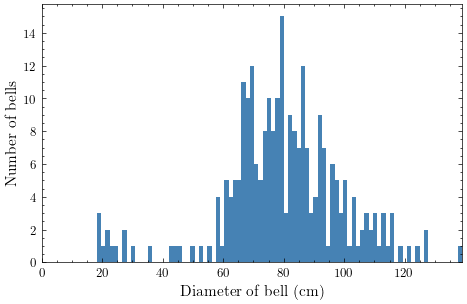

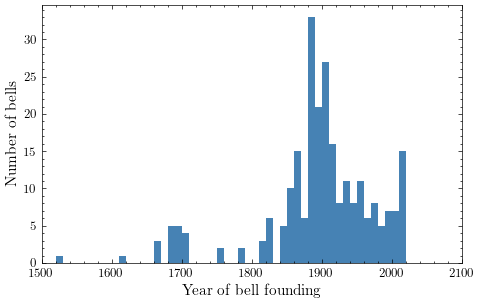

In [17]:
%matplotlib inline
Geoplt.make_all_plots(
    my_towers, 
    fileprefix="my_towers",
    region="England",
)